62012
2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
59
59
This took 0.0019958019256591797 seconds
[1e-39, -0.00042905656896614577, -0.00042905656896614577, -0.00042905656896614577, 0.002788867698251367, 0.006650376818927625, 0.00815207481029961, 0.010297357655130339, 0.012442640499942014, 0.01265716878441556]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
60
60
This took 0.0010023117065429688 seconds
[-0.00042905656896614577, -0.00042905656896614577, -0.00042905656896614577, 0.002788867698251367, 0.006650376818927625, 0.00815207481029961, 0.010297357655130339, 0.012442640499942014, 0.01265716878441556, 0.01287169706890816]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
61
61
This took 0.0033597946166992188 seconds
[1e-39, 1e-39, 0.0032179380739922043, 0.007079463762798093, 0.008581168197331599, 0.010726460246678789, 0.012871752296006924, 0.013086281500932119, 0.013300810705876362, 0.013300810705876362]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
62
62
This took 0.0009889602661132812 seconds
[1e-39, 0.0032179380739922043, 0.007079463762798093, 0.008581168197331599, 0.010726460246678789, 0.012871752296006924, 0.013086281500932119, 0.013300810705876362, 0.013300810705876362, 0.013300810705876362]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
63
63
This took 0.0010001659393310547 seconds
[0.0032179380739922043, 0.007079463762798093, 0.008581168197331599, 0.010726460246678789, 0.012871752296006924, 0.013086281500932119, 0.013300810705876362, 0.013300810705876362, 0.013300810705876362, 0.012657223091081733]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
64
64
This took 0.0010020732879638672 seconds
[0.0038614014312990407, 0.0053630575434687735, 0.007508280560867715, 0.009653503578247603, 0.00986802587997797, 0.010082548181727392, 0.010082548181727392, 0.010082548181727392, 0.009438981276517235, 0.009009936673018394]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
65
65
This took 0.0010001659393310547 seconds
[0.00150159812943807, 0.003646738314363207, 0.005791878499269291, 0.00600639251775228, 0.006220906536254319, 0.006220906536254319, 0.006220906536254319, 0.0055773644807863045, 0.005148336443782224, 0.005148336443782224]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
66
66
This took 0.001089334487915039 seconds
[0.0021451079740239247, 0.004290215948028798, 0.004504726745421663, 0.004719237542833582, 0.004719237542833582, 0.004719237542833582, 0.0040757051506359315, 0.003646683555812094, 0.003646683555812094, 0.0038611943532240126]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
67
67
This took 0.0009999275207519531 seconds
[0.0021450619601097185, 0.0023595681561130693, 0.0025740743521354727, 0.0025740743521354727, 0.0025740743521354727, 0.0019305557641063676, 0.0015015433720615614, 0.0015015433720615614, 0.0017160495680839645, 0.0021450619601097185]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
68
68
This took 0.0009987354278564453 seconds
[0.0002145015948112369, 0.0004290031896415255, 0.0004290031896415255, 0.0004290031896415255, -0.0002145015948112369, -0.0006435047844718139, -0.0006435047844718139, -0.0004290031896415255, 1e-39, -0.0004290031896415255]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
69
69
This took 0.0 seconds
[0.0002145011347219336, 0.0002145011347219336, 0.0002145011347219336, -0.00042900226940576424, -0.0008580045388496316, -0.0008580045388496316, -0.0006435034041276978, -0.00021450113470288212, -0.0006435034041276978, -0.00021450113470288212]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
70
70
This took 0.0009982585906982422 seconds
[1e-39, 1e-39, -0.0006435020238085547, -0.00107250337303966, -0.00107250337303966, -0.0008580026984241074, -0.0004290013492120537, -0.0008580026984241074, -0.0004290013492120537, 1e-39]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
71
71
This took 0.0 seconds
[1e-39, -0.0006435020238085547, -0.00107250337303966, -0.00107250337303966, -0.0008580026984241074, -0.0004290013492120537, -0.0008580026984241074, -0.0004290013492120537, 1e-39, 0.001287004047636161]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
72
72
This took 0.0012607574462890625 seconds
[-0.0006435020238085547, -0.00107250337303966, -0.00107250337303966, -0.0008580026984241074, -0.0004290013492120537, -0.0008580026984241074, -0.0004290013492120537, 1e-39, 0.001287004047636161, 0.004504514166678935]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
73
73
This took 0.0009987354278564453 seconds
[-0.00042900410988123456, -0.00042900410988123456, -0.00021450205494061728, 0.00021450205492156563, -0.00021450205494061728, 0.00021450205492156563, 0.0006435061647837486, 0.0019305184943702973, 0.00514804931828904, 0.009438090416891818]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
74
74
This took 0.000993967056274414 seconds
[1e-39, 0.00021450297516719655, 0.0006435089254825379, 0.00021450297516719655, 0.0006435089254825379, 0.0010725148757978792, 0.0023595327267439035, 0.005577077354061335, 0.009867136857195697, 0.009867136857195697]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
75
75
This took 0.0009970664978027344 seconds
[0.00021450297516719655, 0.0006435089254825379, 0.00021450297516719655, 0.0006435089254825379, 0.0010725148757978792, 0.0023595327267439035, 0.005577077354061335, 0.009867136857195697, 0.009867136857195697, 0.008365616031101527]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
76
76
This took 0.00099945068359375 seconds
[0.0004290050300867882, 1e-39, 0.0004290050300867882, 0.0008580100601735764, 0.002145025150433941, 0.005362562876037223, 0.009652613176886054, 0.009652613176886054, 0.008151095571591821, 0.007507588026471165]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
77
77
This took 0.0009942054748535156 seconds
[-0.0004290031896415255, 1e-39, 0.0004290031896415255, 0.001716012758566102, 0.004933536680829914, 0.009223568577226116, 0.009223568577226116, 0.007722057413490303, 0.007078552629037541, 0.005148038275660202]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
78
78
This took 0.0009989738464355469 seconds
[0.0004290050300867882, 0.0008580100601735764, 0.002145025150433941, 0.005362562876037223, 0.009652613176886054, 0.009652613176886054, 0.008151095571591821, 0.007507588026471165, 0.005577065391090144, 0.005577065391090144]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
79
79
This took 0.0019998550415039062 seconds
[0.0004290031896415255, 0.001716012758566102, 0.004933536680829914, 0.009223568577226116, 0.009223568577226116, 0.007722057413490303, 0.007078552629037541, 0.005148038275660202, 0.005148038275660202, 0.005577041465301727]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
80
80
This took 0.000997781753540039 seconds
[0.001287004047636161, 0.004504514166678935, 0.00879452765878042, 0.00879452765878042, 0.007293022936547759, 0.006649520912739204, 0.004719014841294488, 0.004719014841294488, 0.005148016190506541, 0.006864021587335705]


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
81
81
This took 0.0009987354278564453 seconds
[0.0032174687100902442, 0.007507426990255021, 0.007507426990255021, 0.006005941592200207, 0.005362447850182158, 0.003431966624108961, 0.003431966624108961, 0.0038609624521273437, 0.005576945764181824, 0.00600594

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
82
82
This took 0.001004934310913086 seconds
[0.004289820256540304, 0.004289820256540304, 0.0027883831667540556, 0.0021449101282796776, 0.0002144910128374931, 0.0002144910128374931, 0.0006434730384934286, 0.00235940114109812, 0.0027883831667540556,

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
83
83
This took 0.0010066032409667969 seconds
[1e-39, -0.001501372683596742, -0.0021448181194184744, -0.004075154426902721, -0.004075154426902721, -0.0036461908030152165, -0.0019303363074842468, -0.001501372683596742, 0.0012868908716625145

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
84
84
This took 0.001991748809814453 seconds
[-0.001501372683596742, -0.0021448181194184744, -0.004075154426902721, -0.004075154426902721, -0.0036461908030152165, -0.0019303363074842468, -0.001501372683596742, 0.00128689

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
85
85
This took 0.0010013580322265625 seconds
[-0.0006434550964807822, -0.0025738203859421785, -0.0025738203859421785, -0.002144850321615307, -0.0004289700643268714, 1e-39, 0.0027883054181151393, 0.00514764077190

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
86
86
This took 0.0009996891021728516 seconds
[-0.0019303777105751565, -0.0019303777105751565, -0.0015014048860007827, 0.0002144864122776617, 0.0006434592368520354, 0.0034317825965759392, 0.0057911331317

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
87
87
This took 0.0009958744049072266 seconds
[1e-39, 0.0004289811055300174, 0.0021449055276310364, 0.002573886633161054, 0.005362263819096642, 0.007721659899502212, 0.00815064100501318, 0.00857

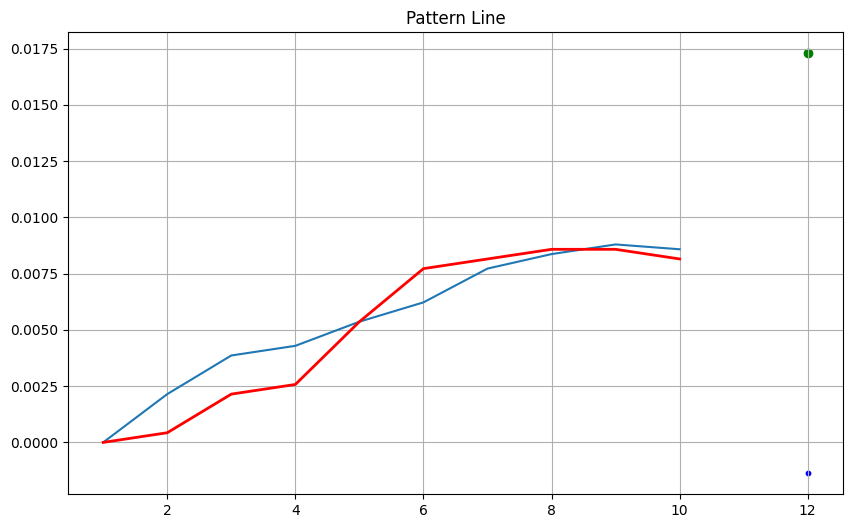

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
88
88
This took 0.0009999275207519531 seconds
[0.0004289811055300174, 0.0021449055276310364, 0.002573886633161054, 0.005362263819096642, 0.007721659899502212, 0.00815064100501318, 0.008

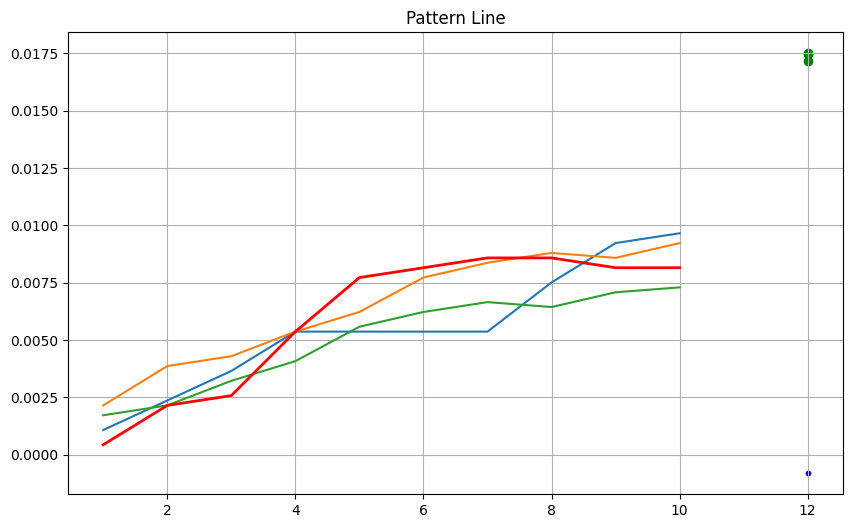

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
89
89
This took 0.002001047134399414 seconds
[0.0017159170611410401, 0.0021448963264310626, 0.004933261550806685, 0.007292647509892285, 0.007721626775163257, 0.00815060604045327

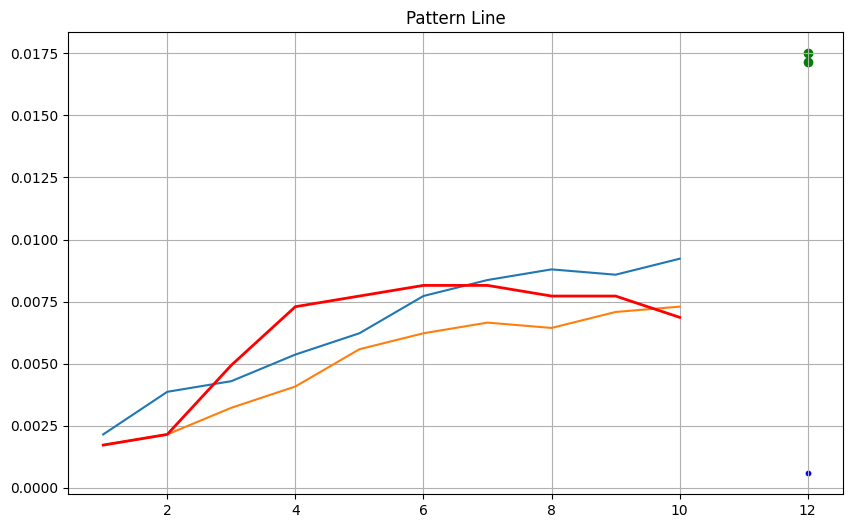

press ENTER to continue \


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
90
90
This took 0.0019979476928710938 seconds
[0.00042897190448792607, 0.0032172892836499203, 0.005576634758323989, 0.006005606662792865, 0.006434578567280791, 0.006434

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
91
91
This took 0.0030143260955810547 seconds
[0.0027883054181151393, 0.005147640771903407, 0.005576610836211229, 0.0060055809005381, 0.0060055809005381, 0.005

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
92
92
This took 0.0031290054321289062 seconds
[0.0023592695701470153, 0.0027882276737927914, 0.003217185777457617, 0.003217185777457617, 0.00278822767

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
93
93
This took 0.001237630844116211 seconds
[0.0004289479836065269, 0.0008578959672321029, 0.0008578959672321029, 0.00042894798360

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
94
94
This took 0.0012083053588867188 seconds
[0.00042894614366974205, 0.00042894614366974205, 1e-39, 1e-39, -0.

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
95
95
This took 0.0010006427764892578 seconds
[1e-39, -0.00042894430372969266, -0.00042894430

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
96
96
This took 0.0010466575622558594 seconds
[-0.00042894430372969266, -0.000428944

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
97
97
This took 0.002000093460083008 seconds
[1e-39, -0.0008578922873394841

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
98
98
This took 0.0012896060943603516 seconds
[-0.0008578922873394

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
99
99
This took 0.000997304916381836 seconds
[-0.00150132

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
100
100
This took 0.0019958019256591797 seconds


press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
101
101
This took 0.002017736

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
102
102
Th

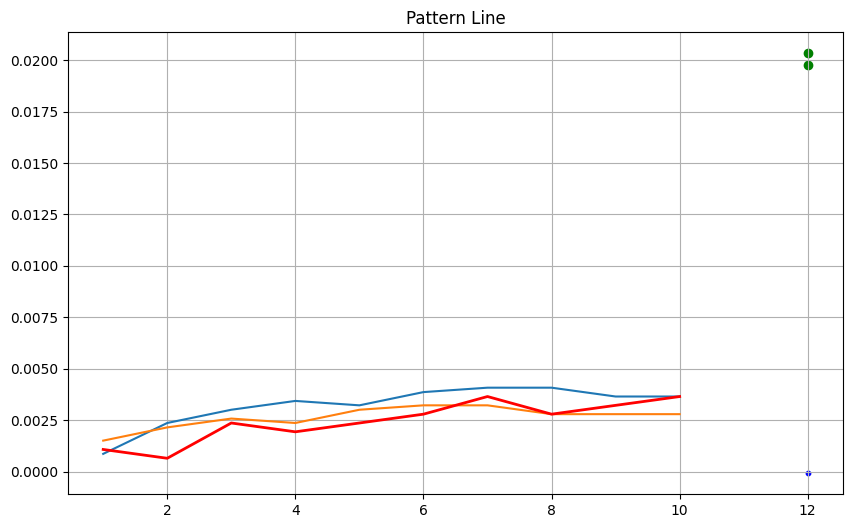

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
103

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

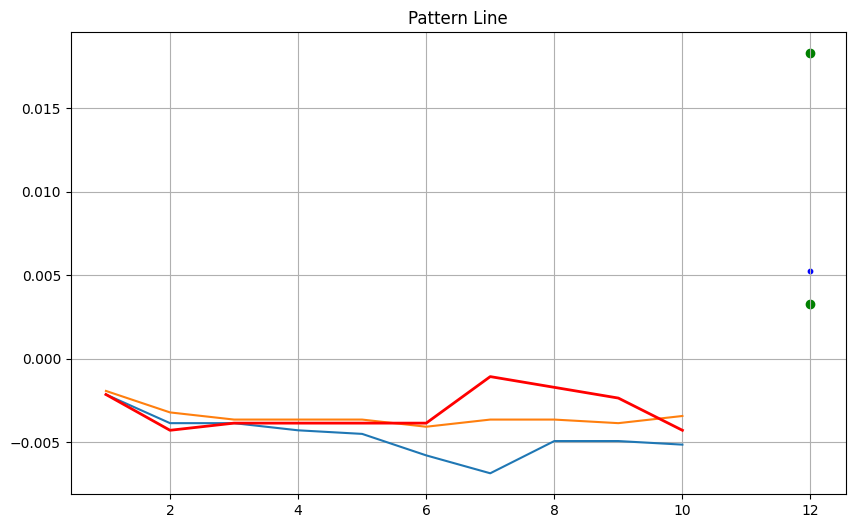

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

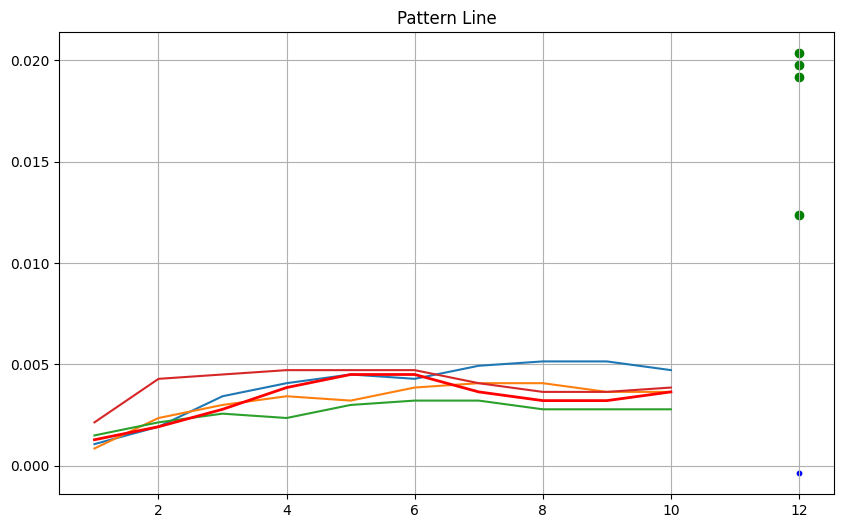

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

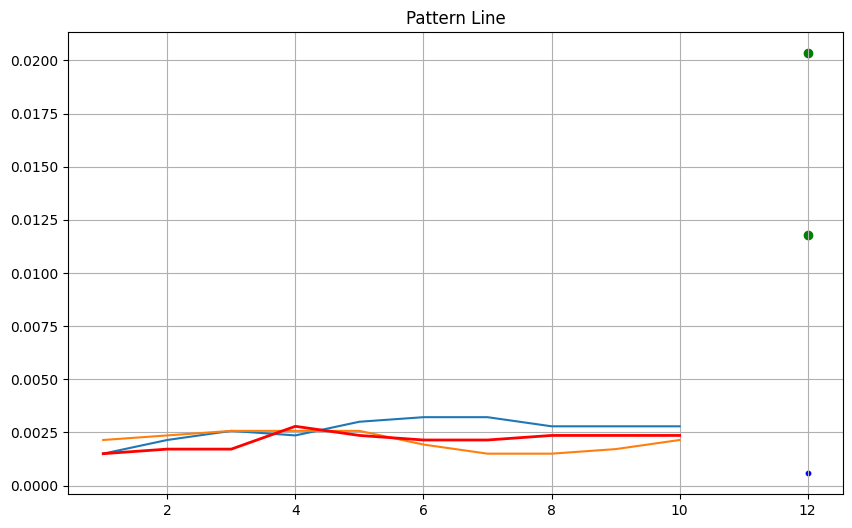

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

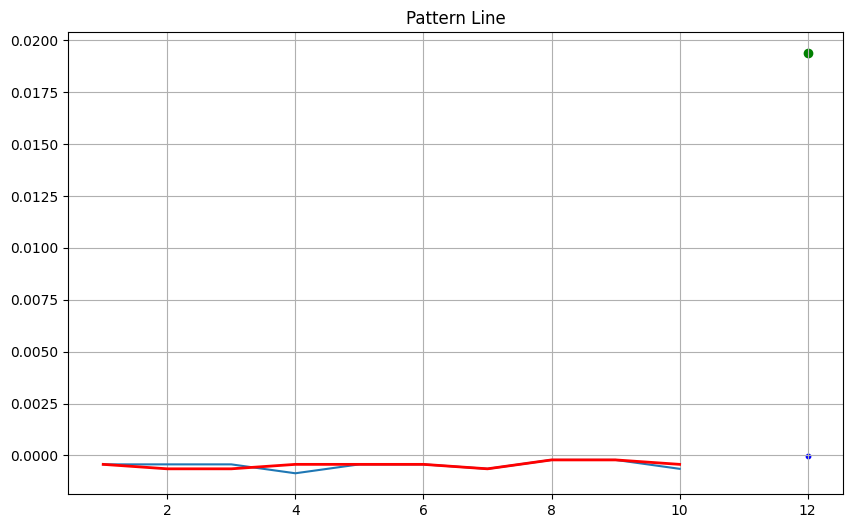

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

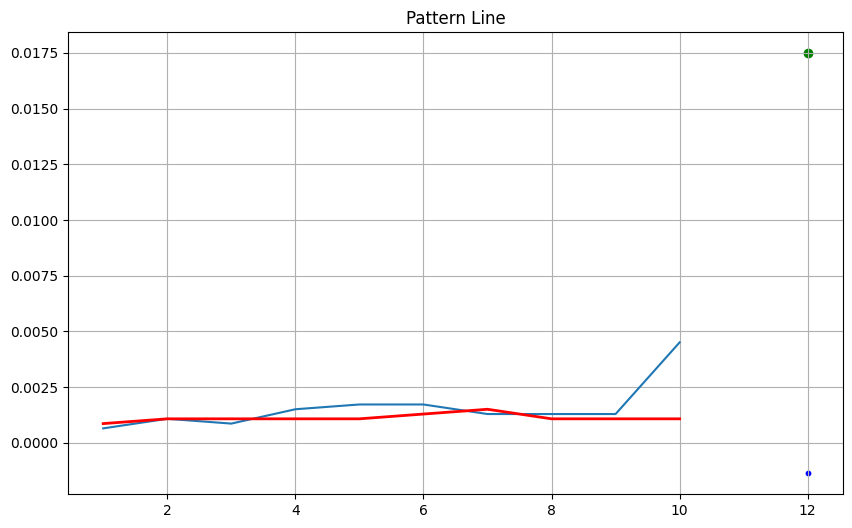

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

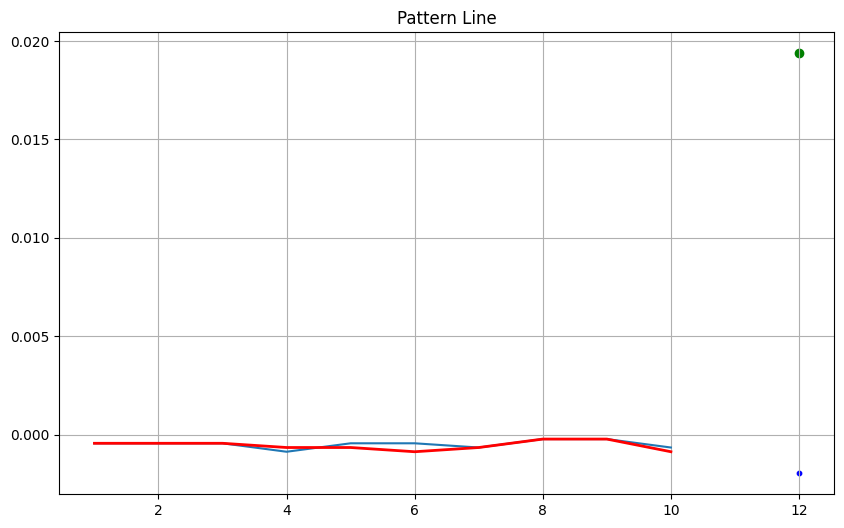

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

press ENTER to continue 


2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

In [ ]:
import matplotlib
import functools
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import csv
import os



# we need this helper function to display our data
def bytespdate2num(fmt,encoding = "utf-8"): # we have our fmt meaning we will need a type of formatting , and our encoding turns a string into a byte object
    def bytesconverter(b):# it will then be encoding using utf-8 syntax , then define another function wih parameter b which becomes our byte obj
        s = b.decode(encoding) # the decode function takes a string and then encodes into a new format in our case it is "utf-8"
        return mdates.datestr2num(s)
    return bytesconverter # we are returning the function which then excecutes its outer function with our encoding specified , we need fmt for all of that


date,bid,ask = np.loadtxt(r"C:\Users\agboo\Downloads\Stock Prediction\GBPUSD\GBPUSD1d.txt",unpack = True, delimiter = ",",converters = {0:bytespdate2num("%Y-%m-&d %H:%M:%S")})       


# we will define a percent change function
def percentChange(startpoint,currentpoint): # new - old / old & 100
    return ((float(currentpoint)-startpoint)/abs(startpoint))*100 + 0.000000000000000000000000000000000000001 # using abs to avoid negtive values
    # using very small decimal to avoid division by zero hopefully adding a decimal this small shouldnt influence our patter recognition

    

def patternstore():
    start = time.time()
    x = len(avgLine) - 30
    
    y = 11
    while y < x:
        pattern = []
        p1 = percentChange(avgLine[y-10],avgLine[y-9]) # since we are doing 10 ticks we need 10 patterns , this will be the first point in the pattern
        p2 = percentChange(avgLine[y-10],avgLine[y-8])
        p3 = percentChange(avgLine[y-10],avgLine[y-7])
        p4 = percentChange(avgLine[y-10],avgLine[y-6])
        p5 = percentChange(avgLine[y-10],avgLine[y-5])
        p6 = percentChange(avgLine[y-10],avgLine[y-4])
        p7 = percentChange(avgLine[y-10],avgLine[y-3])
        p8 = percentChange(avgLine[y-10],avgLine[y-2])
        p9 = percentChange(avgLine[y-10],avgLine[y-1])
        p10 = percentChange(avgLine[y-10],avgLine[y-0])

        outcomeRange = avgLine[y + 20 : y + 30] # produces array of points
        currentpoint = avgLine[y]
        

        # we need reduce so we can apply our lamda to our array outcome range
        try:   
            avgoutcome = (functools.reduce(lambda x, y: x+y , outcomeRange) / len(outcomeRange))
        except Exception as e:
            print(e)# this will give use what ever error happend
            avgoutcome = 0
        futureoutcome = percentChange(currentpoint,avgoutcome)
        pattern.append(p1)
        pattern.append(p2)
        pattern.append(p3)
        pattern.append(p4)
        pattern.append(p5)
        pattern.append(p6)
        pattern.append(p7)
        pattern.append(p8)
        pattern.append(p9)
        pattern.append(p10)
        patternArray.append(pattern)
        performance.append(futureoutcome)
        # no we are storing patterns as they come , our list will grow very fast
        

        # then we use a lamda exspression to then avg all of our variables
        print(currentpoint) # current point

        y += 1 # this way we are iterating through
    end = time.time()
    print(len(patternArray))
    print(len(performance))
    
    print("This took " + str(end - start) + " seconds")
    # sucessfully stores patterns as arrays


    

def graphRawFX(): # to plot data
    date,bid,ask = np.loadtxt(r"C:\Users\agboo\Downloads\Stock Prediction\GBPUSD\GBPUSD1d.txt",unpack = True, delimiter = ",",converters = {0:bytespdate2num("%Y-%m-&d %H:%M:%S")}) # numbers to date
    # we need the entire file path with np load
                              
    fig = plt.figure(figsize=(10,7)) # creating figure then denoting its size
    axis = plt.subplot2grid((40,40),(0,0),rowspan=40,colspan=40) # 40 by 40 grid , starting at origin , row and column spans of 40 apart
    axis.plot(date,bid)
    axis.plot(date,ask)

    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)



    
    axis.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-&d %H:%M:%S")) # making our x axis more user freindly to look at
    for label in axis.xaxis.get_ticklabels():
        label.set_rotation(45) # this causes the rotation on the graph we rotated it five degrees
    second_axis = axis.twinx()
    second_axis.fill_between(date, 0 ,(ask - bid) , facecolor = "purple" , alpha = 0.3) # this is the spread , # higher spread is bad , lower spread means more liquid
    # more likley to buy

    # we want longer decimals

    plt.subplots_adjust(bottom = 0.23) # further formatitng
    plt.grid(True) # so grid appears
    plt.show()



def currentpattern():

    cp1 = percentChange(avgLine[-11],avgLine[-10]) # this way as we are collecting patterns the span we 
    cp2 = percentChange(avgLine[-11],avgLine[-9])
    cp3 = percentChange(avgLine[-11],avgLine[-8]) # we can reach  increases 1 , 2, 3 ...
    cp4 = percentChange(avgLine[-11],avgLine[-7]) # if we have a pattern within this tick that is similar later then we can use it for
    cp5 = percentChange(avgLine[-11],avgLine[-6])# prediction later in the stock chart
    cp6 = percentChange(avgLine[-11],avgLine[-5])
    cp7 = percentChange(avgLine[-11],avgLine[-4])
    cp8 = percentChange(avgLine[-11],avgLine[-3])
    cp9 = percentChange(avgLine[-11],avgLine[-2])
    cp10 = percentChange(avgLine[-11],avgLine[-1])

    recog_pattern.append(cp1)
    recog_pattern.append(cp2)
    recog_pattern.append(cp3)
    recog_pattern.append(cp4)
    recog_pattern.append(cp5)
    recog_pattern.append(cp6)
    recog_pattern.append(cp7)
    recog_pattern.append(cp8)
    recog_pattern.append(cp9)
    recog_pattern.append(cp10)
    print(recog_pattern) # so this is the pattern we will examine and then compare to other patters

def pattern_recognition():



    patfound = False
    patternplot = []

    
    for pattern in patternArray:
        sim1 = 100 - abs(percentChange(pattern[0] , recog_pattern[0])) # return the similarity 
        sim2 = 100 - abs(percentChange(pattern[1] , recog_pattern[1])) # return the next step
        sim3 = 100 - abs(percentChange(pattern[2] , recog_pattern[2])) # return 
        sim4 = 100 - abs(percentChange(pattern[3] , recog_pattern[3])) # return 
        sim5 = 100 - abs(percentChange(pattern[4] , recog_pattern[4])) # return 
        sim6 = 100 - abs(percentChange(pattern[5] , recog_pattern[5])) # return 
        sim7 = 100 - abs(percentChange(pattern[6] , recog_pattern[6])) # return 
        sim8 = 100 - abs(percentChange(pattern[7] , recog_pattern[7])) # return 
        sim9 = 100 - abs(percentChange(pattern[8] , recog_pattern[8])) # return 
        sim10 = 100 - abs(percentChange(pattern[9] , recog_pattern[9])) # return 
        # to extend this pattern add more varibles using n = 30 from statistics we can start to see real patterns
        # we would have to do this for all functions defined
        similarity = (sim1 + sim2 + sim3 + sim4 + sim5 + sim6 + sim7 + sim8 + sim9 + sim10) / 10

        if similarity > 70:

            patfound = True

            patdex = patternArray.index(pattern) # returning the step we are in
            print(recog_pattern)
            print(pattern)
            print("--------------------")
            print("predicted outcome " + str(patternArray[patdex]))
            xp = [1,2,3,4,5,6,7,8,9,10]
            patternplot.append(pattern) # when we find the pattern we will append it to a plot so we can see how the patern scales up


    if patfound == True:    
        
        fig = plt.figure(figsize=(10,6))


        for eachpatt in patternplot:
            prediction_point = patternArray.index(eachpatt) # pattern array index should match outcome array

            if performance[prediction_point] > recog_pattern[9]: # meaning we are predicting a rise
                pcolor = "green"
            else:
                pcolor = "red"
                


            
            plt.plot(xp,eachpatt)
            plt.scatter(12,performance[prediction_point],c = pcolor) # plots prediction as a point
                       
                       
                       
                       
      
                       
                       
        real_range = Data[stopping_point+10:stopping_point+20] # 10 to 20 in the future

        realoutcome = (functools.reduce(lambda x, y: x+y , real_range) / len(real_range))

        real_movement = percentChange(Data[stopping_point],realoutcome) #percent change of last point from the 100

        plt.scatter(12,real_movement, c = "#0000ff" , s = 10)

        
        plt.plot(xp,recog_pattern,"#ff0000" , linewidth = 2) # making the pattern line always red
        plt.grid(True)
        plt.title("Pattern Line")
        plt.show()
        patfound = False
        # showing how diffrent our patterns in question is to our predicted outcome
        # it is supposed to be similar in the begining
        # now after the loop is over it will then append to the graph per se


# this will simulate as the data is being loaded




datalength = int(bid.shape[0])
print(datalength)

stopping_point = 100 # so a 100 iterations is where we will consider a pattern
Data = bid + ask / 2

while stopping_point < datalength:

    avgLine = bid + ask / 2 #if we were to consider all the data we had but we are trying to simulate live data being fed in
    avgLine = avgLine[:stopping_point] # every time we increment it will clear the pattern and redo it # this way we are getting better patterns

    patternArray = []
    performance = []
    recog_pattern = []
    
    
    
    patternstore() # store pattern
    currentpattern() # find pattern in question
    pattern_recognition() # from the step within the array print our predicted outcome
    # this outputs a 10tick pattern
    # take range of data in succession then create key pattersn to return key events
    move = input("press ENTER to continue")
    stopping_point += 1 # clears after every data point + 1 in 100 , 101 , 102 , 103 ...
    

    





    
    
